In [133]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [134]:
# load in final merged dataset
total_data = "combined_jun13.csv"
df = pd.read_csv(total_data, encoding = "ISO-8859-1" )

In [3]:
print("Shape of full dataset: {}".format(df))

Shape of full dataset:        Unnamed: 0     ID  YEAR_FIPS  YEAR  STATE_FIPS  COUNTY_FIPS  \
0               0      0   20121001  2012           1            1   
1               1      1   20121003  2012           1            3   
2               2      2   20121005  2012           1            5   
3               3      3   20121007  2012           1            7   
4               4      4   20121009  2012           1            9   
...           ...    ...        ...   ...         ...          ...   
15432       15432  18850   20089007  2008           9            7   
15433       15433  18851   20089009  2008           9            9   
15434       15434  18852   20089011  2008           9           11   
15435       15435  18853   20089013  2008           9           13   
15436       15436  18854   20089015  2008           9           15   

             STATE             COUNTY    FIPS REP_CANDIDATE  ... NA_FEMALE%  \
0          Alabama     Autauga County  1001.0   Mitt Romn

In [4]:
#Negative Margin of victory implies larger win for republicans
df['MARGIN_VICTORY']=abs((df['DEM_VOTES']/df['COUNTY_TOTALVOTES'])-(df['REP_VOTES']/df['COUNTY_TOTALVOTES']))
df['TOT_WA%'] = df['WA_MALE%'] + df['WA_FEMALE%']
df['TOT_BA%'] = df['BA_MALE%'] + df['BA_FEMALE%']
df['TOT_H%'] = df['H_MALE%'] + df['H_FEMALE%']

In [5]:
df.head(10)

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
0,0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,...,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0.460304,0.792801,0.177941,0.023889
1,1,1,20121003,2012,1,3,Alabama,Baldwin County,1003.0,Mitt Romney,...,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0.557688,0.876354,0.094664,0.044039
2,2,2,20121005,2012,1,5,Alabama,Barbour County,1005.0,Mitt Romney,...,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0.031454,0.508452,0.471899,0.049250
3,3,3,20121007,2012,1,7,Alabama,Bibb County,1007.0,Mitt Romney,...,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0.466746,0.766221,0.220400,0.017926
4,4,4,20121009,2012,1,9,Alabama,Blount County,1009.0,Mitt Romney,...,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0.740940,0.965785,0.014188,0.081275
5,5,5,20121011,2012,1,11,Alabama,Bullock County,1011.0,Mitt Romney,...,0.459276,0.540724,0.248759,0.273212,0.285255,0.192774,0.527997,0.263651,0.710884,0.071429
6,6,6,20121013,2012,1,13,Alabama,Butler County,1013.0,Mitt Romney,...,0.529940,0.470060,0.266068,0.232452,0.272467,0.229013,0.075084,0.545268,0.435727,0.009407
7,7,7,20121015,2012,1,15,Alabama,Calhoun County,1015.0,Mitt Romney,...,0.517780,0.482220,0.259882,0.262102,0.274019,0.203997,0.319238,0.764444,0.206546,0.032935
8,8,8,20121017,2012,1,17,Alabama,Chambers County,1017.0,Mitt Romney,...,0.521833,0.478167,0.247641,0.230057,0.287088,0.235215,0.051673,0.592902,0.389074,0.015796
9,9,9,20121019,2012,1,19,Alabama,Cherokee County,1019.0,Mitt Romney,...,0.503889,0.496111,0.237545,0.210056,0.295026,0.257373,0.549545,0.932740,0.046239,0.012551


In [6]:
# see all columns in merged dataframe
print(df.columns)

Index(['Unnamed: 0', 'ID', 'YEAR_FIPS', 'YEAR', 'STATE_FIPS', 'COUNTY_FIPS',
       'STATE', 'COUNTY', 'FIPS', 'REP_CANDIDATE', 'DEM_CANDIDATE',
       'REP_VOTES', 'DEM_VOTES', 'COUNTY_TOTALVOTES', 'WINNING_CANDIDATE',
       'WINNING_PARTY', 'WINNING_PARTY_BINARY', 'HOUSE_WINNING_BINARY',
       'SENATE_WINNING_BINARY', 'UNEMPLOYMENT_RATE', 'AVG_WAGE_SALARY',
       'AA_FEMALE', 'AA_MALE', 'BA_FEMALE', 'BA_MALE', 'H_FEMALE', 'H_MALE',
       'IA_FEMALE', 'IA_MALE', 'NA_FEMALE', 'NA_MALE', 'TOT_FEMALE',
       'TOT_MALE', 'TOT_POP', 'WA_FEMALE', 'WA_MALE', 'TOT_POP_LESS19',
       'TOT_MALE_LESS19', 'TOT_FEMALE_LESS19', 'TOT_POP_20to39',
       'TOT_MALE_20to39', 'TOT_FEMALE_20to39', 'TOT_POP_40to59',
       'TOT_MALE_40to59', 'TOT_FEMALE_40to59', 'TOT_POP_Above60',
       'TOT_MALE_Above60', 'TOT_FEMALE_Above60', 'AA_FEMALE%', 'AA_MALE%',
       'BA_FEMALE%', 'BA_MALE%', 'H_FEMALE%', 'H_MALE%', 'IA_FEMALE%',
       'IA_MALE%', 'NA_FEMALE%', 'NA_MALE%', 'WA_FEMALE%', 'WA_MALE%',
     

In [7]:
# see how many nulls there are within dataframe
df.isnull().sum()

Unnamed: 0          0
ID                  0
YEAR_FIPS           0
YEAR                0
STATE_FIPS          0
                   ..
TOT_POP_Above60%    0
MARGIN_VICTORY      0
TOT_WA%             0
TOT_BA%             0
TOT_H%              0
Length: 70, dtype: int64

In [8]:
# see how many nulls there are within dataframe
df.describe()

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,FIPS,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
count,15437.000000,15437.000000,1.543700e+04,15437.000000,15437.000000,15437.000000,15437.000000,1.543700e+04,1.543700e+04,1.543700e+04,...,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000,15437.000000
mean,7718.000000,9842.295265,1.838708e+08,2008.034722,30.641640,103.602902,30745.243117,1.912239e+04,2.017164e+04,4.019208e+04,...,0.501840,0.498160,0.267314,0.242665,0.276653,0.213369,0.291992,0.864514,0.091433,0.076575
std,4456.422388,5780.402235,5.271925e+07,5.660778,14.984992,108.116249,15004.119529,4.417742e+04,7.185842e+04,1.148100e+05,...,0.021356,0.021356,0.034897,0.044546,0.026337,0.053222,0.196820,0.158742,0.146440,0.129256
min,0.000000,0.000000,2.000100e+07,2000.000000,1.000000,1.000000,1001.000000,5.400000e+01,4.000000e+00,6.400000e+01,...,0.278792,0.425760,0.083033,0.118812,0.089292,0.027190,0.000012,0.091430,0.000000,0.000000
25%,3859.000000,4230.000000,2.000485e+08,2004.000000,19.000000,35.000000,19073.000000,2.909000e+03,1.600000e+03,4.856000e+03,...,0.497669,0.487669,0.246773,0.214722,0.262610,0.177398,0.127231,0.819706,0.005046,0.013608
50%,7718.000000,10987.000000,2.008212e+08,2008.000000,29.000000,79.000000,29510.000000,6.339000e+03,3.961000e+03,1.068300e+04,...,0.505558,0.494442,0.266625,0.239430,0.277704,0.208984,0.264285,0.933157,0.021527,0.027831
75%,11577.000000,14921.000000,2.012391e+08,2012.000000,46.000000,133.000000,46017.000000,1.603000e+04,1.080100e+04,2.770900e+04,...,0.512331,0.502331,0.286111,0.265578,0.291647,0.244484,0.432126,0.970204,0.106276,0.071946
max,15436.000000,18854.000000,2.016560e+08,2016.000000,56.000000,840.000000,56045.000000,1.076225e+06,2.464364e+06,3.434308e+06,...,0.574240,0.721208,0.475359,0.548296,0.462687,0.632964,1.209800,1.000000,0.865371,0.975417


In [9]:
#Checking if data contains one hot encoded data
df['WINNING_PARTY_BINARY'].describe()
#df['WINNING_PARTY_BINARY'].head()

count    15437.000000
mean         0.786034
std          0.410117
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: WINNING_PARTY_BINARY, dtype: float64

In [10]:
#Size of Dataset after dropping null values - 2020 data has been dropped in this dataset as we dont have election predictions
df.shape

(15437, 70)

## EXPLORATORY DATA ANALYSIS

In [11]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15437 entries, 0 to 15436
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15437 non-null  int64  
 1   ID                     15437 non-null  int64  
 2   YEAR_FIPS              15437 non-null  int64  
 3   YEAR                   15437 non-null  int64  
 4   STATE_FIPS             15437 non-null  int64  
 5   COUNTY_FIPS            15437 non-null  int64  
 6   STATE                  15437 non-null  object 
 7   COUNTY                 15437 non-null  object 
 8   FIPS                   15437 non-null  float64
 9   REP_CANDIDATE          15437 non-null  object 
 10  DEM_CANDIDATE          15437 non-null  object 
 11  REP_VOTES              15437 non-null  float64
 12  DEM_VOTES              15437 non-null  float64
 13  COUNTY_TOTALVOTES      15437 non-null  float64
 14  WINNING_CANDIDATE      15437 non-null  object 
 15  WI

In [12]:
#Determining Missing values
# No missing values
df[df.isnull().any(axis=1)]

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
0,0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,...,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0.460304,0.792801,0.177941,0.023889
1,1,1,20121003,2012,1,3,Alabama,Baldwin County,1003.0,Mitt Romney,...,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0.557688,0.876354,0.094664,0.044039
2,2,2,20121005,2012,1,5,Alabama,Barbour County,1005.0,Mitt Romney,...,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0.031454,0.508452,0.471899,0.049250
3,3,3,20121007,2012,1,7,Alabama,Bibb County,1007.0,Mitt Romney,...,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0.466746,0.766221,0.220400,0.017926
4,4,4,20121009,2012,1,9,Alabama,Blount County,1009.0,Mitt Romney,...,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0.740940,0.965785,0.014188,0.081275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15432,15432,18850,20089007,2008,9,7,Connecticut,Middlesex County,9007.0,John McCain,...,0.511756,0.488244,0.244606,0.228491,0.323946,0.202956,0.230153,0.910741,0.047469,0.042253
15433,15433,18851,20089009,2008,9,9,Connecticut,New Haven County,9009.0,John McCain,...,0.518593,0.481407,0.261191,0.257549,0.290398,0.190863,0.231454,0.811429,0.132198,0.135312
15434,15434,18852,20089011,2008,9,11,Connecticut,New London County,9011.0,John McCain,...,0.502263,0.497737,0.253542,0.252781,0.305432,0.188245,0.210676,0.860287,0.062456,0.074663
15435,15435,18853,20089013,2008,9,13,Connecticut,Tolland County,9013.0,John McCain,...,0.496066,0.503934,0.264143,0.271978,0.302295,0.161584,0.208299,0.918934,0.033102,0.039514


In [13]:
# generate preview of entries with null values
if len(df[df.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    print(df[df.isnull().any(axis=1)].tail(3))
    plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
   Unnamed: 0  ID  YEAR_FIPS  YEAR  STATE_FIPS  COUNTY_FIPS    STATE  \
0           0   0   20121001  2012           1            1  Alabama   
1           1   1   20121003  2012           1            3  Alabama   
2           2   2   20121005  2012           1            5  Alabama   

           COUNTY    FIPS REP_CANDIDATE  ... TOT_FEMALE%  TOT_MALE%  \
0  Autauga County  1001.0   Mitt Romney  ...    0.512912   0.487088   
1  Baldwin County  1003.0   Mitt Romney  ...    0.510581   0.489419   
2  Barbour County  1005.0   Mitt Romney  ...    0.469301   0.530699   

   TOT_POP_LESS19%  TOT_POP_20to39% TOT_POP_40to59% TOT_POP_Above60%  \
0         0.293056         0.252858        0.282427         0.171659   
1         0.253453         0.230183        0.282293         0.234071   
2         0.242225         0.270801        0.278741         0.208233   

   MARGIN_VICTORY   TOT_WA%   TOT_BA%    TOT_H%  
0        0.460304  0.792801  0.177941 

As it appears the missing values are primarily in the 2008 and 2012 data.

In [14]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")


No duplicated entries found


In [15]:
#number of counties in the consolidated dataset
df['FIPS'].nunique()

3114

The Dataset does not contain all the counties. 

## MARGIN OF VICTORY

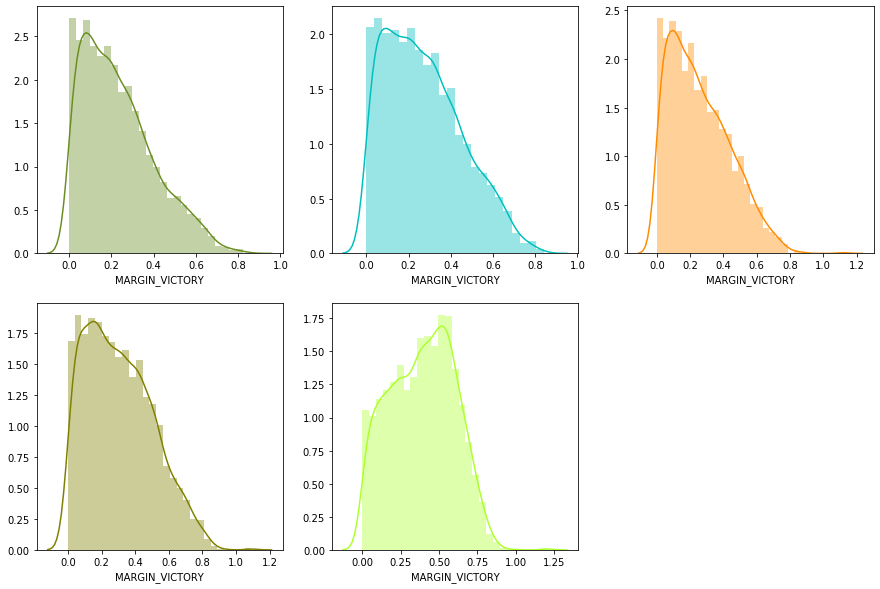

In [16]:
#Margin of victory analysis by Year
def histPlot(first_feature,col):
    sns.distplot(first_feature,color=col);

f = plt.figure(figsize=(15,10))
f.add_subplot(231)
histPlot(df[df.YEAR==2000]['MARGIN_VICTORY'],'olivedrab')
f.add_subplot(232)
histPlot(df[df.YEAR==2004]['MARGIN_VICTORY'],'c')
f.add_subplot(233)
histPlot(df[df.YEAR==2008]['MARGIN_VICTORY'],'darkorange')
f.add_subplot(234)
histPlot(df[df.YEAR==2012]['MARGIN_VICTORY'],'olive')
f.add_subplot(235)
histPlot(df[df.YEAR==2016]['MARGIN_VICTORY'],'greenyellow')

#We observe below that in 2016 more counties were won with a larger margin of victory

## ECONOMIC VARIABLES BY WINNING PARTY

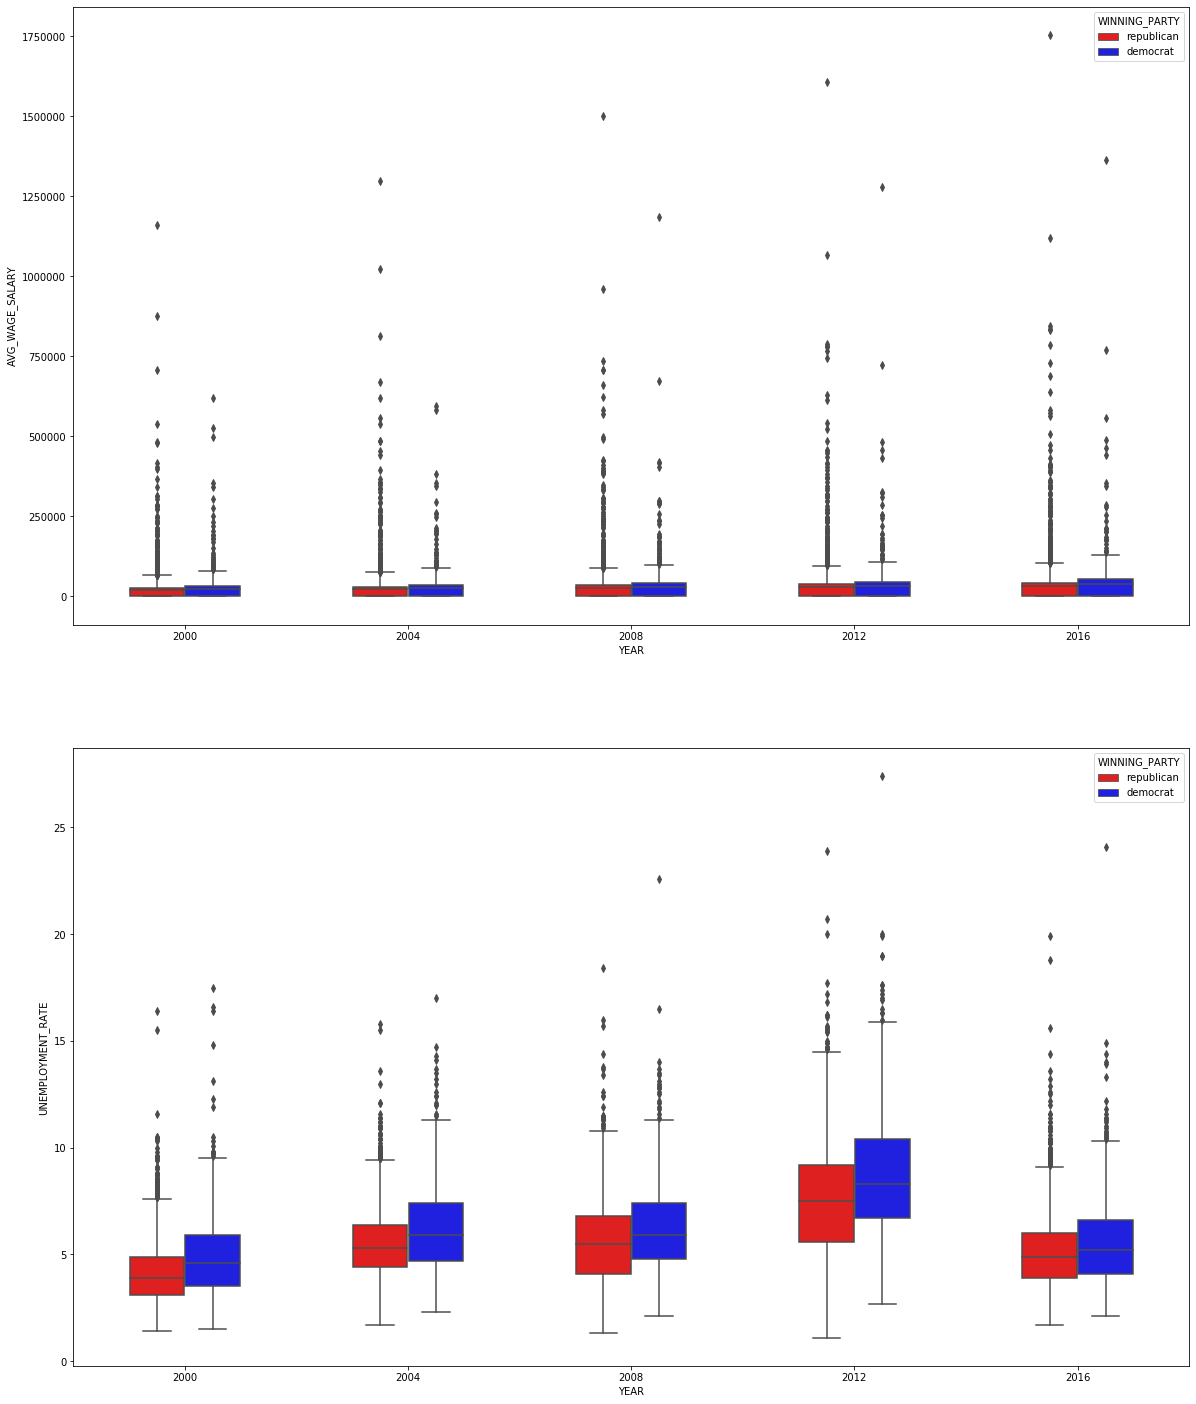

In [17]:
#Analyzing the Economic Variables
colors = ['red','blue']
cmap = sns.color_palette(colors)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df, palette=cmap, width=0.5,hue="WINNING_PARTY");

f = plt.figure(figsize=(20,25))
f.add_subplot(211)
boxPlot('YEAR','AVG_WAGE_SALARY')
f.add_subplot(212)
boxPlot('YEAR','UNEMPLOYMENT_RATE')


## ECONOMIC VARIABLES BY WINNING PARTY AND YEAR

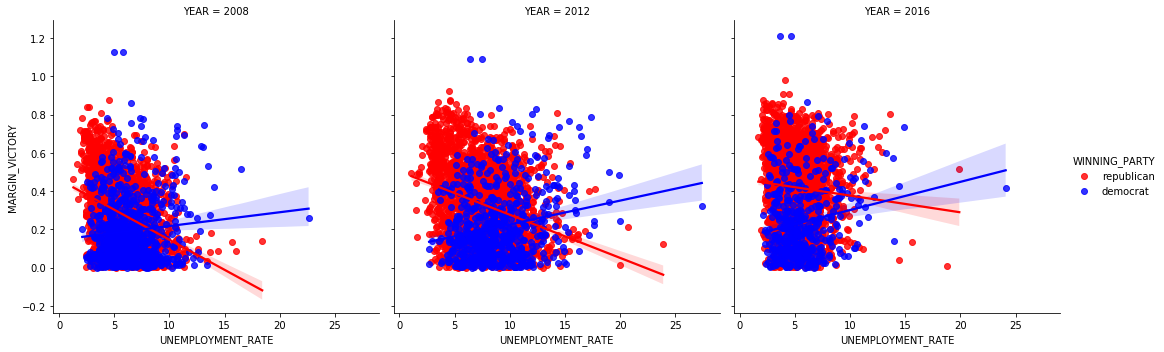

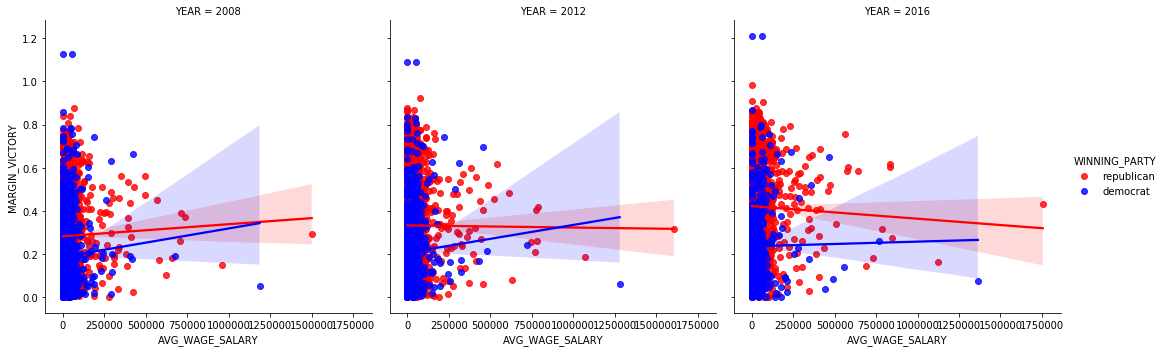

In [18]:
colors = ['red','blue']
cmap = sns.color_palette(colors)
year=[2008,2012,2016]
df_year = df[df.YEAR.isin(year)]

sns.lmplot(x="UNEMPLOYMENT_RATE", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="AVG_WAGE_SALARY", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");

## RACIAL MIX BY WINNING PARTY AND YEAR

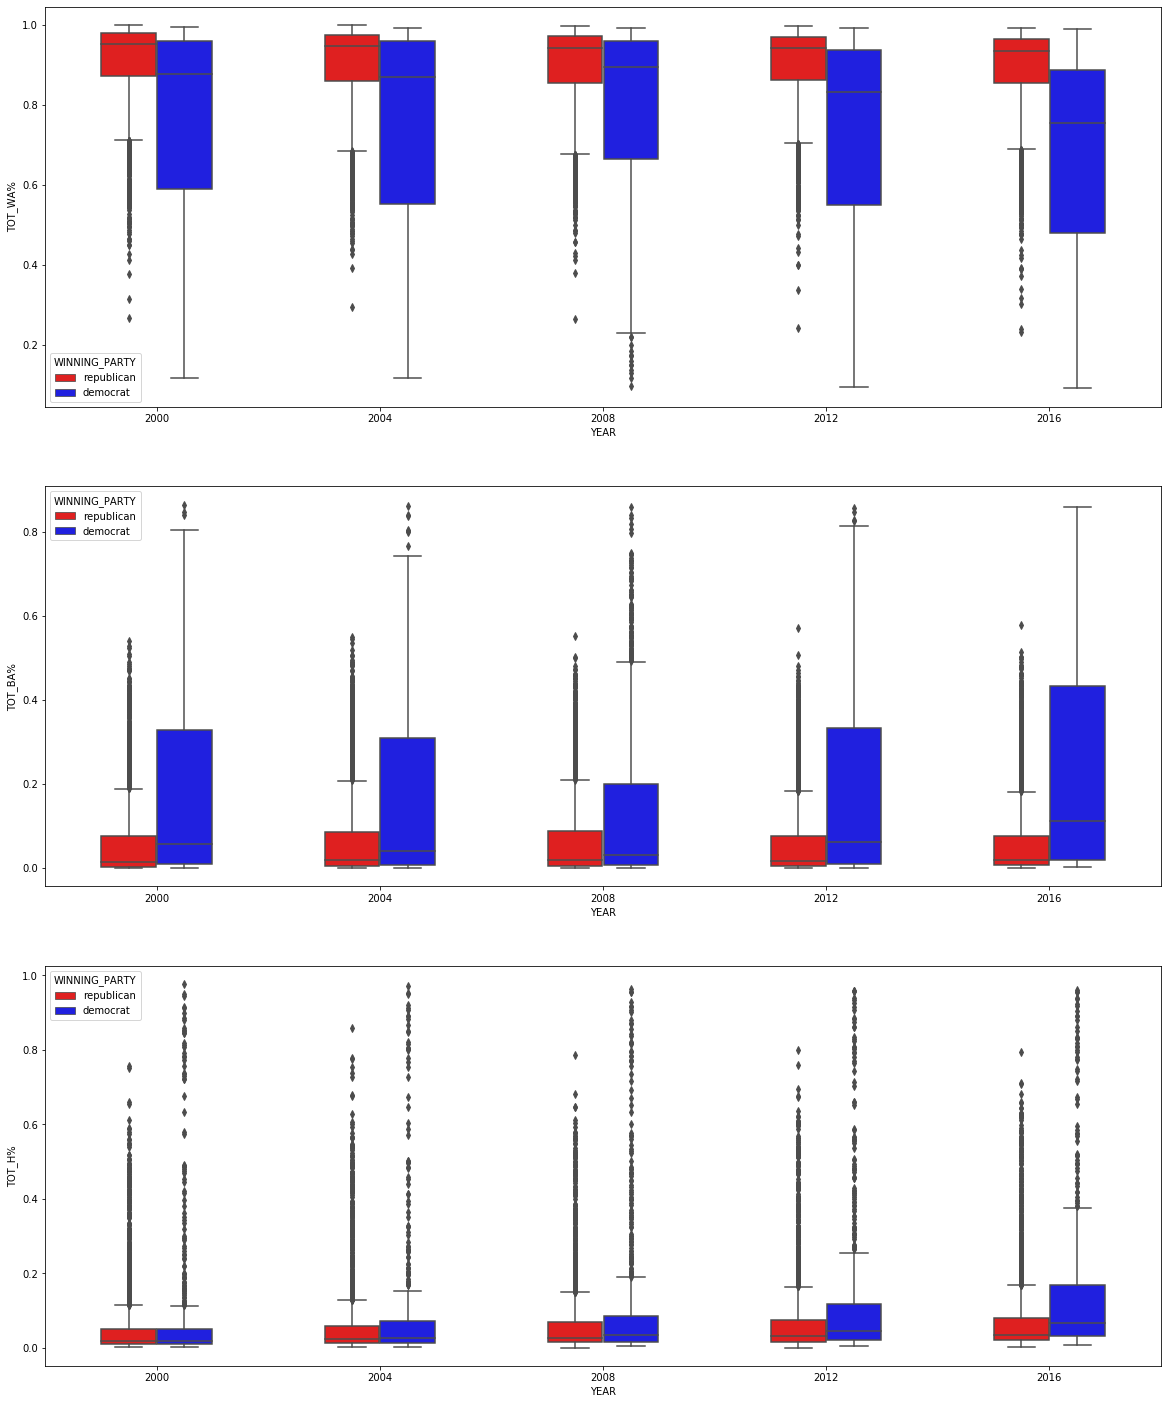

In [19]:
#Analyzing the Economic Variables
colors = ['red','blue']
cmap = sns.color_palette(colors)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df, palette=cmap, width=0.5,hue="WINNING_PARTY");

f = plt.figure(figsize=(20,25))
f.add_subplot(311)
boxPlot('YEAR','TOT_WA%')
f.add_subplot(312)
boxPlot('YEAR','TOT_BA%')
f.add_subplot(313)
boxPlot('YEAR','TOT_H%')

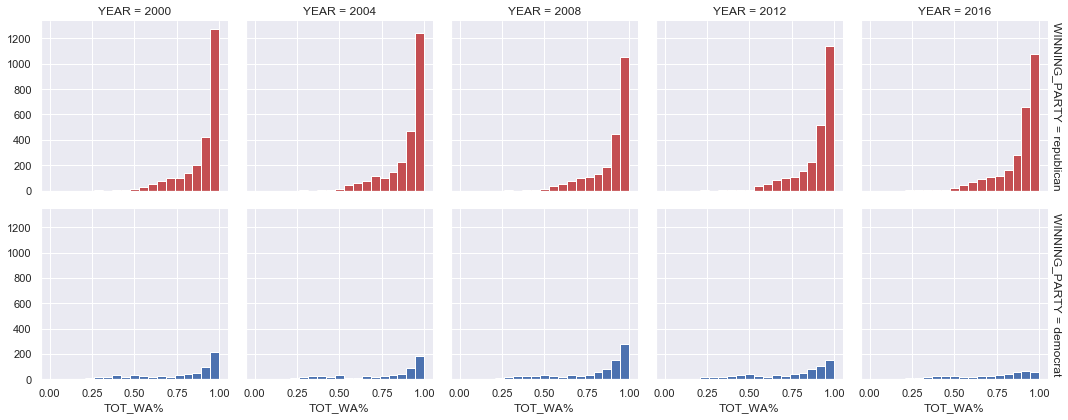

In [20]:
#Analyzing White Population Mix and Winning Party
sns.set(style="darkgrid")
d = {'color': ['r', 'b']}
g = sns.FacetGrid(df, row="WINNING_PARTY", col="YEAR", margin_titles=True,hue_kws=d,hue="WINNING_PARTY")
bins = np.linspace(0, 1, 20)
g.map(plt.hist, "TOT_WA%", bins=bins)

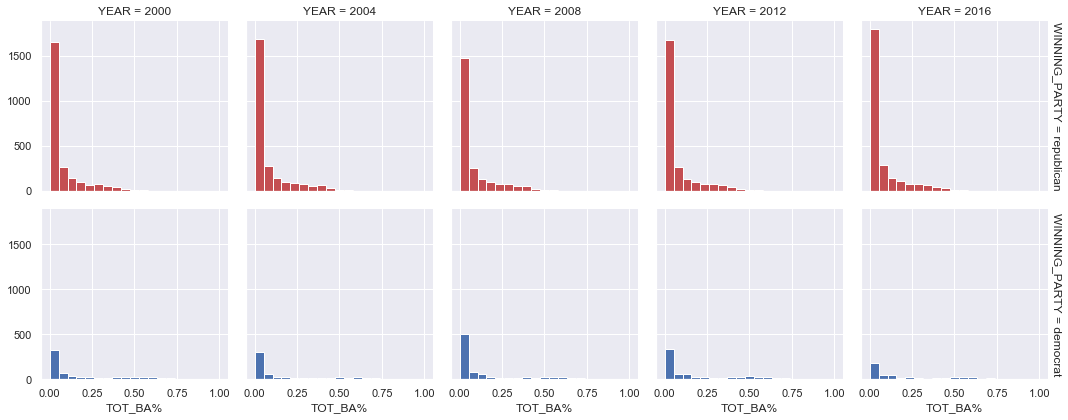

In [21]:
#Analyzing BLack Population Mix and Winning Party
sns.set(style="darkgrid")
d = {'color': ['r', 'b']}
g = sns.FacetGrid(df, row="WINNING_PARTY", col="YEAR", margin_titles=True,hue_kws=d,hue="WINNING_PARTY")
bins = np.linspace(0, 1, 20)
g.map(plt.hist, "TOT_BA%", bins=bins)


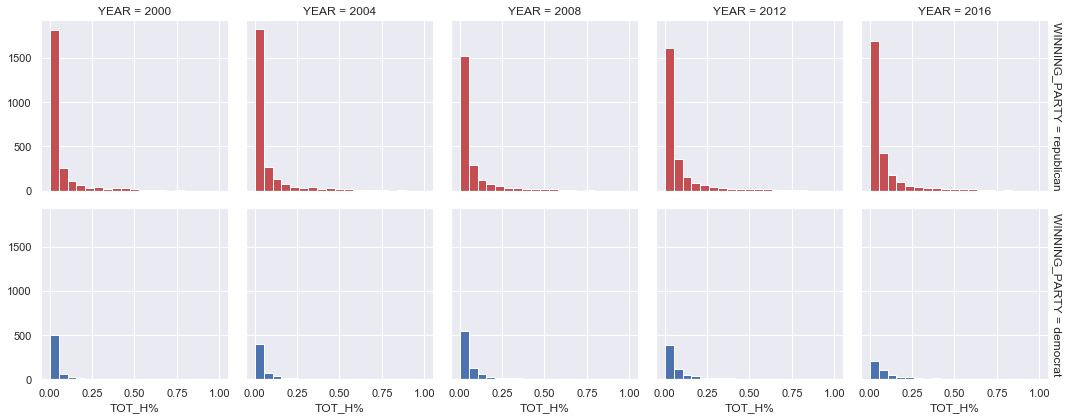

In [22]:
#Analyzing Hispanic Population Mix and Winning Party
sns.set(style="darkgrid")
d = {'color': ['r', 'b']}
g = sns.FacetGrid(df, row="WINNING_PARTY", col="YEAR", margin_titles=True,hue_kws=d,hue="WINNING_PARTY")
bins = np.linspace(0, 1, 20)
g.map(plt.hist, "TOT_H%", bins=bins)

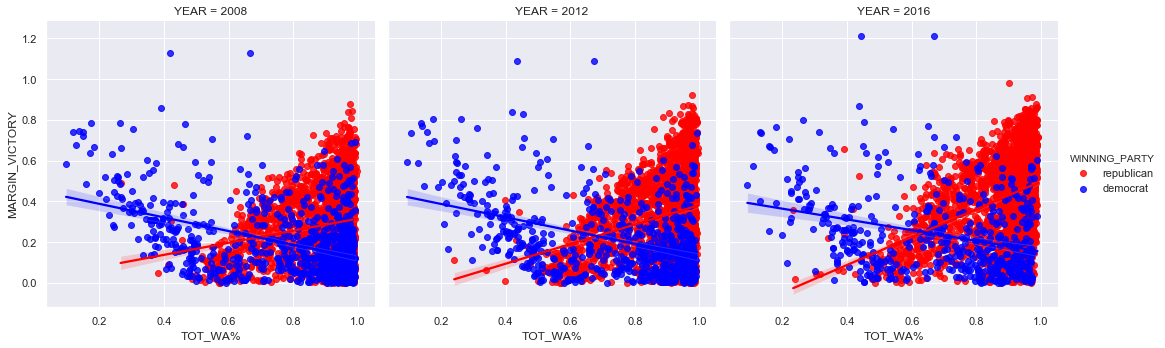

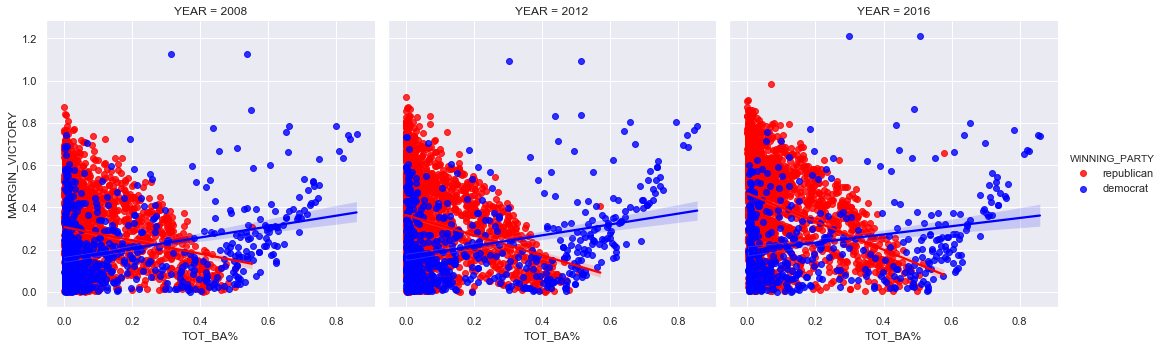

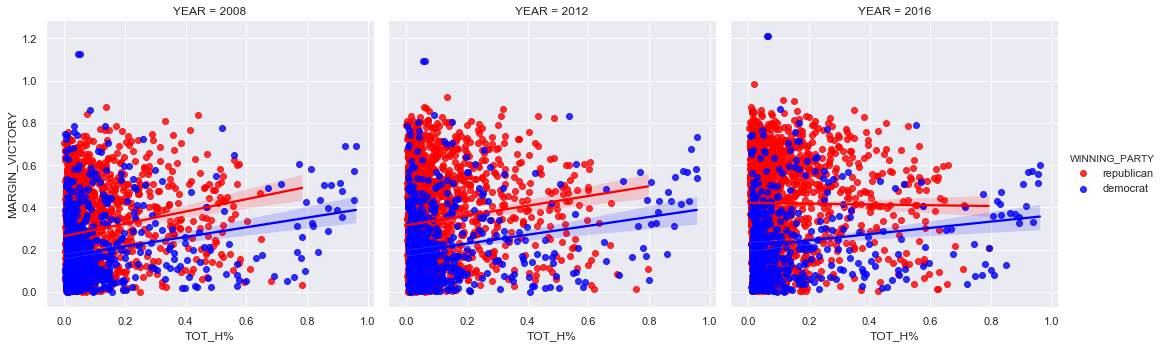

In [23]:
#Analyzing Racial Mix with Year and Winning Party
colors = ['red','blue']
cmap = sns.color_palette(colors)
year=[2008,2012,2016]
df_year = df[df.YEAR.isin(year)]

sns.lmplot(x="TOT_WA%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_BA%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_H%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap,  col="YEAR");

## AGE GROUP BY WINNING PARTY AND YEAR

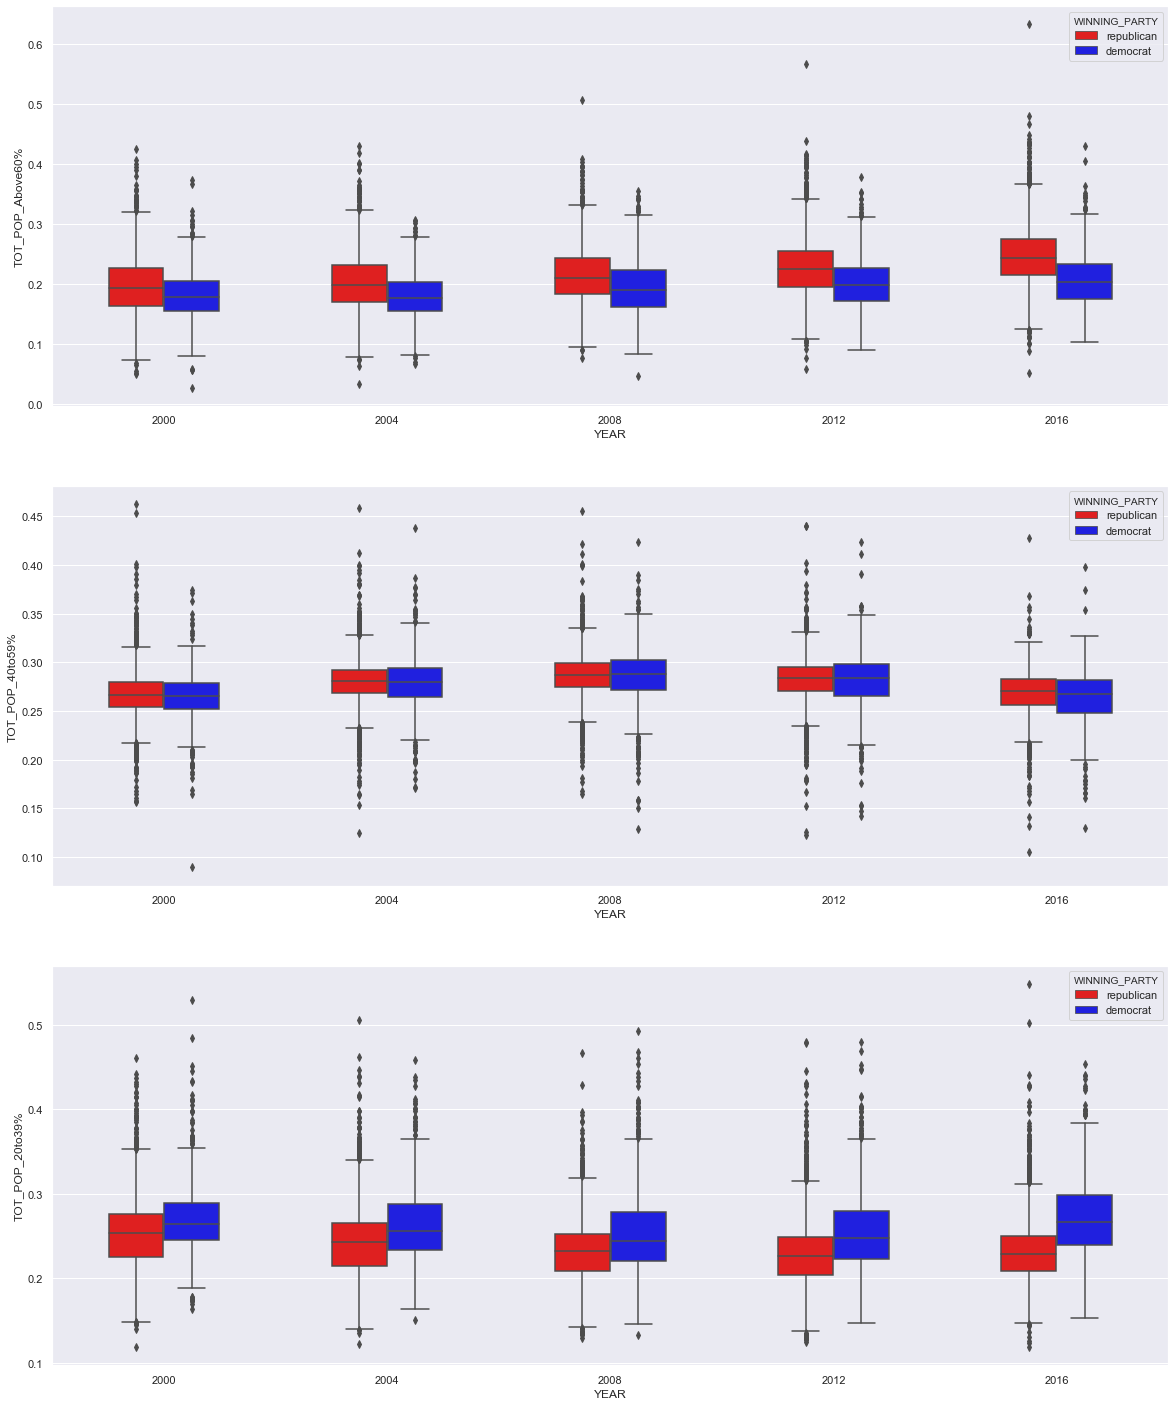

In [24]:
#Analyzing Age group incluence on the results
colors = ['red','blue']
cmap = sns.color_palette(colors)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df, palette=cmap, width=0.5,hue="WINNING_PARTY");

f = plt.figure(figsize=(20,25))
f.add_subplot(311)
boxPlot('YEAR','TOT_POP_Above60%')
f.add_subplot(312)
boxPlot('YEAR','TOT_POP_40to59%')
f.add_subplot(313)
boxPlot('YEAR','TOT_POP_20to39%')

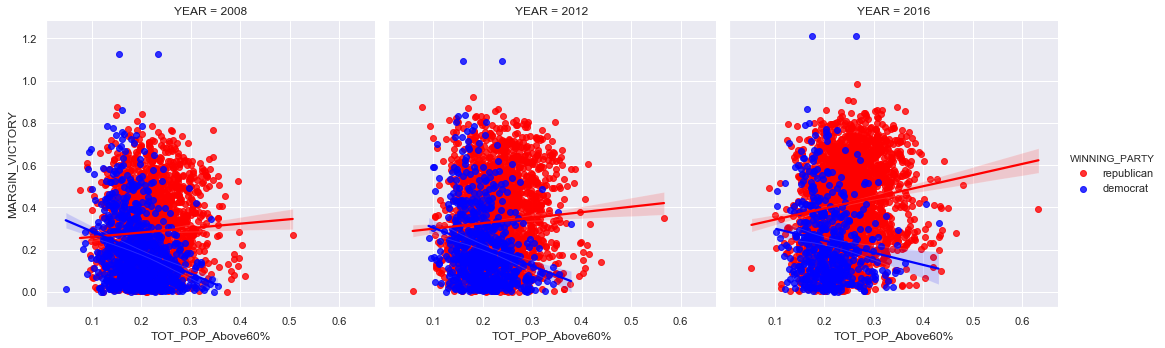

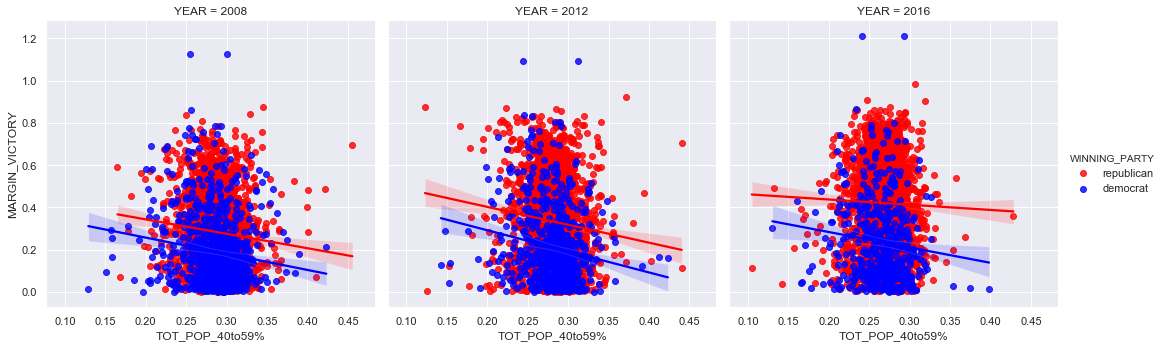

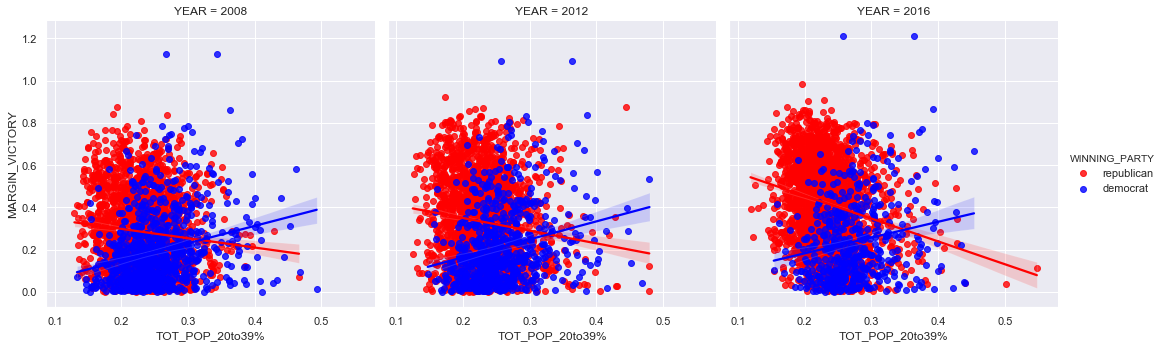

In [25]:
#Analyzing Racial Mix with Year and Winning Party
colors = ['red','blue']
cmap = sns.color_palette(colors)
year=[2008,2012,2016]
df_year = df[df.YEAR.isin(year)]

sns.lmplot(x="TOT_POP_Above60%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_POP_40to59%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap, col="YEAR");
sns.lmplot(x="TOT_POP_20to39%", y="MARGIN_VICTORY",hue="WINNING_PARTY",data=df_year, palette=cmap,  col="YEAR");

# ANALYZING NUMBER OF SWING STATES

In [26]:
#Margin of Victory Analysis
df['MARGIN_VICTORY'].describe()

count    15437.000000
mean         0.291992
std          0.196820
min          0.000012
25%          0.127231
50%          0.264285
75%          0.432126
max          1.209800
Name: MARGIN_VICTORY, dtype: float64

In [27]:
#Filtering for Margin of Victory less than 1%
df_swing_1 = df[(df.MARGIN_VICTORY < 0.01)]

In [28]:
df_swing_1['MARGIN_VICTORY'].describe()

count    308.000000
mean       0.004955
std        0.002899
min        0.000012
25%        0.002260
50%        0.004963
75%        0.007515
max        0.009928
Name: MARGIN_VICTORY, dtype: float64

In [29]:
#Number of counties with Margin of Victory less than 1%
df_swing_1.groupby('YEAR').count()

,Unnamed: 0,ID,YEAR_FIPS,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
YEAR,,,,,,,,,,,,,,,,,,,,,
2000,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
2004,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
2008,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
2012,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2016,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [30]:
#Filtering for Margin of Victory less than 2%
df_swing_2 = df[(df.MARGIN_VICTORY < 0.02)]

In [31]:
df_swing_2['MARGIN_VICTORY'].describe()

count    613.000000
mean       0.009845
std        0.005707
min        0.000012
25%        0.004959
50%        0.009899
75%        0.014606
max        0.019963
Name: MARGIN_VICTORY, dtype: float64

In [32]:
#Number of counties with Margin of Victory less than 5%
df_swing_2.groupby('YEAR').count()

,Unnamed: 0,ID,YEAR_FIPS,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,...,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
YEAR,,,,,,,,,,,,,,,,,,,,,
2000,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
2004,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
2008,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
2012,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
2016,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62


# EXPLORING INCORPORATING PRESIDENT APPROVAL RATINGS DATA

In [33]:
# read in president approval rating dataset
potus_ratings = "https://raw.githubusercontent.com/ehuang13/w210-presidential-election/master/data/potus_approval_rating.csv"
ratings_df = pd.read_csv(potus_ratings)

In [34]:
# check out ratings dataframe
print("POTUS ratings data dimensions: {}".format(ratings_df.shape))
ratings_df.sample(5)

POTUS ratings data dimensions: (4264, 7)


,start_date,end_date,approve,disapprove,unsure,president,reelection_year
3735,7/25/2010,7/27/2010,45,49,6,Barack Obama,2012.0
1793,2/20/2016,2/22/2016,47,49,4,Barack Obama,NaN
4101,7/8/2009,7/10/2009,58,35,7,Barack Obama,2012.0
948,3/16/1998,3/16/1998,66,29,4,Bill Clinton,NaN
1362,8/15/2019,8/30/2019,39,57,4,Donald Trump,NaN


In [35]:
# filter dataframe to re-election years only
reelection_df = ratings_df[ratings_df["reelection_year"].notna()]

In [36]:
# summarize avg approval rating by president during reelection years
reelection_df = reelection_df.groupby("president").mean()

In [37]:
# create a column to indicate presidents who were not reelected
lost_reelection = ["Gerald R. Ford", "Jimmy Carter", "George H.W. Bush"]
reelected = [0 if president in lost_reelection else 1 for president in reelection_df.index]
reelection_df["reelected"] = reelected

In [38]:
# check out reelection dataframe
reelection_df.head(5)

,approve,disapprove,unsure,reelection_year,reelected
president,,,,,
Barack Obama,48.937785,43.327769,7.727618,2012.0,1
Bill Clinton,49.810345,40.620690,8.215517,1997.0,1
Dwight D. Eisenhower,68.461538,17.057692,12.538462,1956.0,1
Franklin D. Roosevelt,72.300000,18.600000,7.300000,1944.0,1
George H.W. Bush,60.126582,28.202532,10.259494,1992.0,0


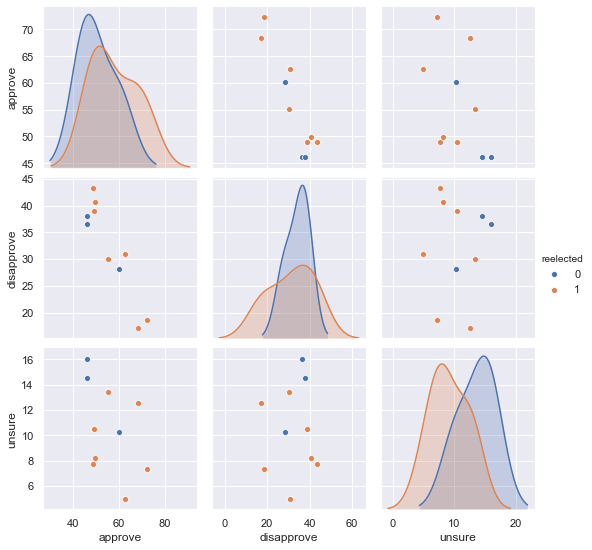

In [39]:
# understand distribution and relationship of approval ratings during reelection years
ax1 = sns.pairplot(reelection_df, vars=["approve", "disapprove", "unsure"], hue = "reelected")

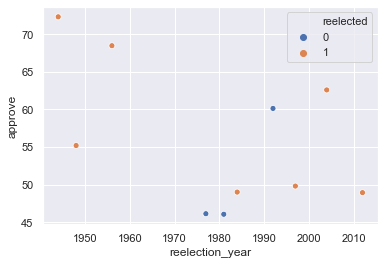

In [40]:
# scatter plot of presidents approval rating in the years
# leading up to the reelection
ax2 = sns.scatterplot(x="reelection_year", y="approve", data=reelection_df, hue="reelected")

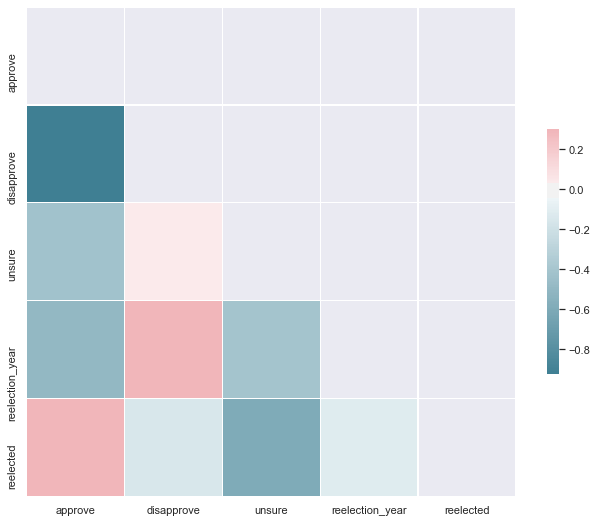

In [41]:
# correlation matrix for reelection against approval ratings
corr = reelection_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# generate custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Counties won by Democrats vs Republican

In [44]:
pd.set_option('max_columns', None)

In [45]:
df.head()

,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
0,0,0,20121001,2012,1,1,Alabama,Autauga County,1001.0,Mitt Romney,Barack Obama,17379.0,6363.0,23932.0,Mitt Romney,republican,1,0.0,NaN,6.9,33766.0,296,201,5152,4591,615,693,131,119,17.0,28,28084,26670,54754,22052,21357,16046,8188,7858,13845,6759,7086,15464,7577,7887,9399,4146,5253,0.005406,0.003671,0.094094,0.083848,0.011232,0.012657,0.002393,0.002173,0.000310,0.000511,0.402747,0.390054,0.512912,0.487088,0.293056,0.252858,0.282427,0.171659,0.460304,0.792801,0.177941,0.023889
1,1,1,20121003,2012,1,3,Alabama,Baldwin County,1003.0,Mitt Romney,Barack Obama,66016.0,18424.0,85338.0,Mitt Romney,republican,1,0.0,NaN,7.5,64282.0,833,551,8913,8421,3614,4450,670,660,55.0,73,93493,89618,183111,81752,78718,46410,23528,22882,42149,21095,21054,51691,25005,26686,42861,19990,22871,0.004549,0.003009,0.048675,0.045988,0.019737,0.024302,0.003659,0.003604,0.000300,0.000399,0.446461,0.429892,0.510581,0.489419,0.253453,0.230183,0.282293,0.234071,0.557688,0.876354,0.094664,0.044039
2,2,2,20121005,2012,1,5,Alabama,Barbour County,1005.0,Mitt Romney,Barack Obama,5550.0,5912.0,11509.0,Barack Obama,democrat,0,0.0,NaN,11.5,64168.0,59,59,6111,6786,599,747,73,88,17.0,29,12826,14504,27330,6482,7414,6620,3373,3247,7401,4461,2940,7618,4124,3494,5691,2546,3145,0.002159,0.002159,0.223600,0.248299,0.021917,0.027333,0.002671,0.003220,0.000622,0.001061,0.237175,0.271277,0.469301,0.530699,0.242225,0.270801,0.278741,0.208233,0.031454,0.508452,0.471899,0.049250
3,3,3,20121007,2012,1,7,Alabama,Bibb County,1007.0,Mitt Romney,Barack Obama,6132.0,2202.0,8420.0,Mitt Romney,republican,1,0.0,NaN,8.5,69624.0,10,12,1972,3069,110,300,32,36,5.0,26,10608,12264,22872,8491,9034,5691,3004,2687,6475,3809,2666,6426,3505,2921,4280,1946,2334,0.000437,0.000525,0.086219,0.134182,0.004809,0.013116,0.001399,0.001574,0.000219,0.001137,0.371240,0.394981,0.463799,0.536201,0.248820,0.283097,0.280955,0.187128,0.466746,0.766221,0.220400,0.017926
4,4,4,20121009,2012,1,9,Alabama,Blount County,1009.0,Mitt Romney,Barack Obama,20757.0,2970.0,24006.0,Mitt Romney,republican,1,0.0,NaN,6.9,60178.0,82,48,390,424,2081,2582,173,177,25.0,36,28988,28385,57373,27995,27415,15550,7963,7587,13866,7017,6849,15869,7941,7928,12088,5464,6624,0.001429,0.000837,0.006798,0.007390,0.036271,0.045004,0.003015,0.003085,0.000436,0.000627,0.487947,0.477838,0.505255,0.494745,0.271033,0.241682,0.276594,0.210691,0.740940,0.965785,0.014188,0.081275


In [69]:
df.loc[df['COUNTY'] == 'Wyoming County']


,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,MARGIN_VICTORY,TOT_WA%,TOT_BA%,TOT_H%
2151,2151,2520,201236121,2012,36,121,New York,Wyoming County,36121.0,Mitt Romney,Barack Obama,9248.0,5357.0,16335.0,Mitt Romney,republican,1,0.0,0.0,8.9,157936.0,93,74,34,2474,236,1021,47,104,4.0,4,19173,22948,42121,18850,20085,9593,4860,4733,10793,6635,4158,13477,7537,5940,8258,3916,4342,0.002208,0.001757,0.000807,0.058736,0.005603,0.024240,0.001116,0.002469,0.000095,0.000095,0.447520,0.476841,0.455189,0.544811,0.227749,0.256238,0.319959,0.196054,0.238200,0.924361,0.059543,0.029843
2572,2572,2941,201242131,2012,42,131,Pennsylvania,Wyoming County,42131.0,Mitt Romney,Barack Obama,6587.0,5061.0,11872.0,Mitt Romney,republican,1,0.0,0.0,8.9,0.0,57,45,78,136,199,242,24,31,3.0,1,14121,14120,28241,13846,13788,6908,3583,3325,6321,3214,3107,8481,4230,4251,6531,3093,3438,0.002018,0.001593,0.002762,0.004816,0.007046,0.008569,0.000850,0.001098,0.000106,0.000035,0.490280,0.488226,0.500018,0.499982,0.244609,0.223824,0.300308,0.231260,0.128538,0.978506,0.007578,0.015616
3308,3308,3678,201254109,2012,54,109,West Virginia,Wyoming County,54109.0,Mitt Romney,Barack Obama,5769.0,1583.0,7523.0,Mitt Romney,republican,1,1.0,0.0,9.2,0.0,19,7,52,71,48,56,14,23,1.0,1,11939,11787,23726,11735,11572,5637,2903,2734,5454,2760,2694,7220,3572,3648,5415,2552,2863,0.000801,0.000295,0.002192,0.002992,0.002023,0.002360,0.000590,0.000969,0.000042,0.000042,0.494605,0.487735,0.503203,0.496797,0.237587,0.229874,0.304308,0.228231,0.556427,0.982340,0.005184,0.004383
4975,4975,5346,201636121,2016,36,121,New York,Wyoming County,36121.0,Donald Trump,Hillary Clinton,12442.0,3904.0,17298.0,Donald Trump,republican,1,0.0,0.0,5.3,165004.0,99,82,62,2443,290,1030,48,105,4.0,4,18768,22361,41129,18376,19510,8755,4451,4304,10683,6493,4190,12519,6966,5553,9172,4451,4721,0.002407,0.001994,0.001507,0.059398,0.007051,0.025043,0.001167,0.002553,0.000097,0.000097,0.446789,0.474361,0.456320,0.543680,0.212867,0.259744,0.304384,0.223006,0.493583,0.921151,0.060906,0.032094
5396,5396,5767,201642131,2016,42,131,Pennsylvania,Wyoming County,42131.0,Donald Trump,Hillary Clinton,8837.0,3811.0,13144.0,Donald Trump,republican,1,0.0,1.0,6.2,0.0,74,58,92,147,238,273,40,37,3.0,1,14063,14102,28165,13719,13720,6499,3358,3141,6361,3262,3099,8080,3998,4082,7225,3484,3741,0.002627,0.002059,0.003266,0.005219,0.008450,0.009693,0.001420,0.001314,0.000107,0.000036,0.487094,0.487129,0.499308,0.500692,0.230747,0.225848,0.286881,0.256524,0.382380,0.974223,0.008486,0.018143
6132,6132,6504,201654109,2016,54,109,West Virginia,Wyoming County,54109.0,Donald Trump,Hillary Clinton,6547.0,1062.0,7831.0,Donald Trump,republican,1,1.0,NaN,10.2,0.0,19,9,48,84,61,70,14,22,1.0,1,11399,11177,22576,11188,10938,5281,2695,2586,5046,2491,2555,6335,3143,3192,5914,2848,3066,0.000842,0.000399,0.002126,0.003721,0.002702,0.003101,0.000620,0.000974,0.000044,0.000044,0.495571,0.484497,0.504917,0.495083,0.233921,0.223512,0.280608,0.261960,0.700421,0.980067,0.005847,0.005803
7825,7825,11094,200036121,2000,36,121,New York,Wyoming County,36121.0,George W. Bush,Al Gore,10809.0,5935.0,17627.0,George W. Bush,republican,1,0.0,0.0,4.8,107756.0,86,106,44,2419,136,1142,59,59,5.0,6,19908,23554,43462,19629,20839,11552,5997,55

In [94]:
#number of counties Dem vs Rep
df['WINNING_PARTY'].value_counts()

republican    12134
democrat       3303
Name: WINNING_PARTY, dtype: int64

In [140]:
# counties that flipped between the two parties in the last 20 years.
state_county_map = {}
county_groupby = df.groupby("COUNTY_FIPS")
count = 0
for name, group in county_groupby:
    winning_party = None
    prev_winning_party = None
    for index, row in group.iterrows():
        winning_party = row['WINNING_PARTY']
        
        if prev_winning_party == None:
            prev_winning_party = winning_party
        
        if prev_winning_party != winning_party:
            #break and move to next county...
            #print("training set add: raw: state={}, county={}".format(raw['STATE'], raw['COUNTY']))
            count +=1
            state_county_map[str(row['STATE_FIPS']) + '_' + str(row['COUNTY_FIPS'])] = 1
            break

print(count)

151


In [141]:
(len(state_county_map))

151

In [154]:
state_county_map

{'4_1': 1,
 '6_3': 1,
 '5_5': 1,
 '9_7': 1,
 '9_9': 1,
 '4_11': 1,
 '6_13': 1,
 '8_14': 1,
 '8_15': 1,
 '2_16': 1,
 '5_17': 1,
 '4_19': 1,
 '2_20': 1,
 '8_21': 1,
 '4_23': 1,
 '6_25': 1,
 '23_27': 1,
 '35_28': 1,
 '23_29': 1,
 '8_31': 1,
 '6_33': 1,
 '6_35': 1,
 '6_37': 1,
 '12_39': 1,
 '5_41': 1,
 '17_43': 1,
 '6_45': 1,
 '5_47': 1,
 '26_49': 1,
 '6_51': 1,
 '6_53': 1,
 '6_55': 1,
 '6_57': 1,
 '8_59': 1,
 '13_61': 1,
 '5_63': 1,
 '5_65': 1,
 '6_67': 1,
 '5_69': 1,
 '6_71': 1,
 '5_73': 1,
 '6_75': 1,
 '5_77': 1,
 '6_79': 1,
 '6_81': 1,
 '6_83': 1,
 '5_85': 1,
 '5_87': 1,
 '13_89': 1,
 '5_91': 1,
 '13_93': 1,
 '6_95': 1,
 '6_97': 1,
 '6_99': 1,
 '5_101': 1,
 '12_103': 1,
 '5_105': 1,
 '5_107': 1,
 '8_109': 1,
 '6_111': 1,
 '5_113': 1,
 '19_115': 1,
 '8_117': 1,
 '8_119': 1,
 '13_121': 1,
 '5_123': 1,
 '26_125': 1,
 '18_127': 1,
 '26_129': 1,
 '5_131': 1,
 '28_133': 1,
 '28_135': 1,
 '27_137': 1,
 '19_139': 1,
 '13_141': 1,
 '17_143': 1,
 '26_145': 1,
 '5_147': 1,
 '28_149': 1,
 '27_151'

In [167]:
#add new column to help us identify county/state combo that should be used in training. 
count_0 = 0
count_1 = 0
for index, row in df.iterrows():
    state_fips = row['STATE_FIPS']
    county_fips = row['COUNTY_FIPS']
    
    key = str(state_fips) + '_' + str(county_fips)
    
    if state_county_map.get(key) == None:
        df['TRAIN'][index] = 0
        count_0 += 1
    else:
        df['TRAIN'][index] = 1
        count_1 += 1
    
print(count_0)
print(count_1)

14683
754


In [168]:
df.loc[df['TRAIN'] == 1]


,Unnamed: 0,ID,YEAR_FIPS,YEAR,STATE_FIPS,COUNTY_FIPS,STATE,COUNTY,FIPS,REP_CANDIDATE,DEM_CANDIDATE,REP_VOTES,DEM_VOTES,COUNTY_TOTALVOTES,WINNING_CANDIDATE,WINNING_PARTY,WINNING_PARTY_BINARY,HOUSE_WINNING_BINARY,SENATE_WINNING_BINARY,UNEMPLOYMENT_RATE,AVG_WAGE_SALARY,AA_FEMALE,AA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,IA_FEMALE,IA_MALE,NA_FEMALE,NA_MALE,TOT_FEMALE,TOT_MALE,TOT_POP,WA_FEMALE,WA_MALE,TOT_POP_LESS19,TOT_MALE_LESS19,TOT_FEMALE_LESS19,TOT_POP_20to39,TOT_MALE_20to39,TOT_FEMALE_20to39,TOT_POP_40to59,TOT_MALE_40to59,TOT_FEMALE_40to59,TOT_POP_Above60,TOT_MALE_Above60,TOT_FEMALE_Above60,AA_FEMALE%,AA_MALE%,BA_FEMALE%,BA_MALE%,H_FEMALE%,H_MALE%,IA_FEMALE%,IA_MALE%,NA_FEMALE%,NA_MALE%,WA_FEMALE%,WA_MALE%,TOT_FEMALE%,TOT_MALE%,TOT_POP_LESS19%,TOT_POP_20to39%,TOT_POP_40to59%,TOT_POP_Above60%,TRAIN
68,68,68,20122016,2012,2,16,Alaska,Aleutians West Census Area,2016.0,Mitt Romney,Barack Obama,2876.0,4013.0,7181.0,Barack Obama,democrat,0,1.0,NaN,6.9,0.0,613,1065,31,326,183,549,398,467,20.0,90,1829,3731,5560,666,1630,898,489,409,1777,1276,501,2354,1620,734,531,346,185,0.110252,0.191547,0.005576,0.058633,0.032914,0.098741,0.071583,0.083993,0.003597,0.016187,0.119784,0.293165,0.328957,0.671043,0.161511,0.319604,0.423381,0.095504,1
69,69,69,20122020,2012,2,20,Alaska,Anchorage Municipality,2020.0,Mitt Romney,Barack Obama,4544.0,3081.0,7964.0,Mitt Romney,republican,1,1.0,NaN,5.4,55893.0,13146,11146,8083,9086,11199,11153,12641,11390,3081.0,3062,144284,149026,293310,95888,103406,84413,43415,40998,90099,46581,43518,83307,41953,41354,35491,17077,18414,0.044819,0.038001,0.027558,0.030977,0.038181,0.038025,0.043098,0.038833,0.010504,0.010439,0.326917,0.352548,0.491916,0.508084,0.287794,0.307180,0.284024,0.121002,1
70,70,96,20124001,2012,4,1,Arizona,Apache County,4001.0,Mitt Romney,Barack Obama,8250.0,17147.0,25848.0,Barack Obama,democrat,0,1.0,1.0,19.0,40041.0,131,92,58,122,1954,2223,26685,25904,8.0,18,35995,35837,71832,8568,9057,25155,12755,12400,16632,8627,8005,17993,8819,9174,12052,5636,6416,0.001824,0.001281,0.000807,0.001698,0.027202,0.030947,0.371492,0.360619,0.000111,0.000251,0.119278,0.126086,0.501100,0.498900,0.350192,0.231540,0.250487,0.167780,1
75,75,101,20124011,2012,4,11,Arizona,Greenlee County,4011.0,Mitt Romney,Barack Obama,1592.0,1310.0,2974.0,Mitt Romney,republican,1,1.0,1.0,8.2,61266.0,30,30,45,57,1954,2043,130,128,2.0,6,3980,4352,8332,3696,4054,2625,1412,1213,2032,1035,997,2233,1203,1030,1442,702,740,0.003601,0.003601,0.005401,0.006841,0.234518,0.245199,0.015602,0.015362,0.000240,0.000720,0.443591,0.486558,0.477676,0.522324,0.315050,0.243879,0.268003,0.173068,1
80,80,106,20124019,2012,4,19,Arizona,Pima County,4019.0,Mitt Romney,Barack Obama,174779.0,201251.0,382250.0,Barack Obama,democrat,0,1.0,1.0,7.4,42614.0,15069,12652,17727,20625,173966,166209,20669,19876,1080.0,1042,499499,482154,981653,431995,415165,257469,131376,126093,260626,131894,128732,252328,122842,129486,211230,96042,115188,0.015351,0.012888,0.018058,0.021010,0.177217,0.169315,0.021055,0.020247,0.001100,0.001061,0.440069,0.422924,0.508835,0.491165,0.262281,0.265497,0.257044,0.215178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15420,15420,18838,20088109,2008,8,109,Colorado,Saguache County,8109.0,John McCain,Barack Obama,953.0,1730.0,2747.0,Barack Obama,democrat,0,1.0,0.0,7.2,27221.0,22,20,13,17,1352,1390,80,85,1.0,0,3044,3104,6148,2870,2932,1609,795,814,1216,629,587,2067,1032,1035,1256,648,608,0.003578,0.003253,0.002115,0.002765,0.219909,0.226090,0.013012,0.013826,0.000163,0.000000,0.466818,0.476903,0.495120,0.504880,0.261711,0.197788,0.336207,0.204294,1
15424,15424,18842,20088117,2008,8,117,Colorado,Summit County,8117.0,John McCain,Barack Obama,4883.0,9802.0,14899.0,Barack Obama,democrat,0,1.0,0.0,3.7,106305.0,125,133,86,187,1534,183